In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("./data/sales_data.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Date              113036 non-null  object
 1   Day               113036 non-null  int64 
 2   Month             113036 non-null  object
 3   Year              113036 non-null  int64 
 4   Customer_Age      113036 non-null  int64 
 5   Age_Group         113036 non-null  object
 6   Customer_Gender   113036 non-null  object
 7   Country           113036 non-null  object
 8   State             113036 non-null  object
 9   Product_Category  113036 non-null  object
 10  Sub_Category      113036 non-null  object
 11  Product           113036 non-null  object
 12  Order_Quantity    113036 non-null  int64 
 13  Unit_Cost         113036 non-null  int64 
 14  Unit_Price        113036 non-null  int64 
 15  Profit            113036 non-null  int64 
 16  Cost              113036 non-null  int

In [4]:
data.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [43]:
data.describe()
data.notnull()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113031,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
113032,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
113033,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
113034,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True


In [6]:
# Extracting Bikes sale from the data
bikes = data[data["Product_Category"] == "Bikes"]

In [7]:
#Query-1.Time Period of max sale in a year

In [8]:
#Creating desired dataframe to get insights

product = pd.Series(bikes.loc[:,"Product"])
unit_cost = pd.Series(bikes.loc[:,"Unit_Cost"])
unit_price = pd.Series(bikes.loc[:,"Unit_Price"])
quantity = pd.Series(bikes.loc[:,"Order_Quantity"])
cost = pd.Series(bikes.loc[:,"Cost"])
revenue = pd.Series(bikes.loc[:,"Revenue"])

# The given profit is gross profit so changing name
gross_profit = pd.Series(bikes.loc[:,"Profit"], name = "Gross_profit")

# Adding extra column discount of 16% to balance corresponding revenue data (intution)
discount = pd.Series((unit_price*quantity*0.16),name="Discount",dtype="int")

date = pd.Series(bikes.loc[:,"Date"])
month = pd.Series(bikes.loc[:,"Month"])
year = pd.Series(bikes.loc[:,"Year"])


column_list = [product,unit_cost,unit_price,quantity,cost,revenue,discount,gross_profit,date,month,year]
sales = pd.concat(column_list, axis=1)
sales = sales.reset_index(drop=False)

sales

,index,Product,Unit_Cost,Unit_Price,Order_Quantity,Cost,Revenue,Discount,Gross_profit,Date,Month,Year
0,49304,"Mountain-100 Silver, 38",1912,3400,1,1912,2856,544,944,2013-01-28,January,2013
1,49305,"Mountain-100 Silver, 38",1912,3400,1,1912,2856,544,944,2015-01-28,January,2015
2,49306,"Mountain-100 Silver, 38",1912,3400,1,1912,2856,544,944,2013-07-22,July,2013
3,49307,"Mountain-100 Silver, 38",1912,3400,2,3824,5712,1088,1888,2015-07-22,July,2015
4,49308,"Mountain-100 Silver, 38",1912,3400,1,1912,2856,544,944,2013-12-25,December,2013
...,...,...,...,...,...,...,...,...,...,...,...,...
25977,112067,"Touring-1000 Blue, 54",1482,2384,3,4446,6866,1144,2420,2016-01-18,January,2016
25978,112068,"Touring-1000 Blue, 54",1482,2384,1,1482,2289,381,807,2014-02-27,February,2014
25979,112069,"Touring-1000 Blue, 54",1482,2384,2,2964,4577,762,1613,2016-02-27,February,2016
25980,112070,"Touring-1000 Blue, 54",1482,2384,1,1482,2289,381,807,2014-06-13,June,2014


In [14]:
# Targeting year 2013 

# 1. revenue greater than the mean revenue of the year
# year_2013 = sales.loc[(sales["Year"] == 2013) & (sales["Revenue"] > sales["Revenue"].mean())]

# 2. revenue greater than or equal 3000
year_2013 = sales.loc[(sales["Year"] == 2013) & (sales["Revenue"] >= 3000)]
max_sale = year_2013.loc[:,"Revenue"].max()
max_sale_inJan = year_2013.loc[(year_2013["Revenue"] == max_sale) & (year_2013["Month"] == "January")]
max_sale_inFeb = year_2013.loc[(year_2013["Revenue"] == max_sale) & (year_2013["Month"] == "February")]
max_sale_inMar = year_2013.loc[(year_2013["Revenue"] == max_sale) & (year_2013["Month"] == "March")]
max_sale_inApr = year_2013.loc[(year_2013["Revenue"] == max_sale) & (year_2013["Month"] == "April")]
max_sale_inMay = year_2013.loc[(year_2013["Revenue"] == max_sale) & (year_2013["Month"] == "May")]
max_sale_inJun = year_2013.loc[(year_2013["Revenue"] == max_sale) & (year_2013["Month"] == "June")]
max_sale_inJul = year_2013.loc[(year_2013["Revenue"] == max_sale) & (year_2013["Month"] == "July")]
max_sale_inAug = year_2013.loc[(year_2013["Revenue"] == max_sale) & (year_2013["Month"] == "August")]
max_sale_inSep = year_2013.loc[(year_2013["Revenue"] == max_sale) & (year_2013["Month"] == "September")]
max_sale_inOct = year_2013.loc[(year_2013["Revenue"] == max_sale) & (year_2013["Month"] == "October")]
max_sale_inNov = year_2013.loc[(year_2013["Revenue"] == max_sale) & (year_2013["Month"] == "November")]
max_sale_inDec = year_2013.loc[(year_2013["Revenue"] == max_sale) & (year_2013["Month"] == "December")]

max_sale_inJan

# Prodct named as Road-150 was sold in the year 2013 with different versions


,index,Product,Unit_Cost,Unit_Price,Order_Quantity,Cost,Revenue,Discount,Gross_profit,Date,Month,Year
17676,66980,"Road-150 Red, 48",2171,3578,1,2171,3542,572,1371,2013-01-03,January,2013


In [15]:
import matplotlib.pyplot as plt


In [ ]:
#number of days company hit max sale in a month 

In [38]:
months = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]

number_of_days = [
                            len(max_sale_inJan.index),
                            len(max_sale_inFeb.index),
                            len(max_sale_inMar.index),
                            len(max_sale_inApr.index),
                            len(max_sale_inMay.index),
                            len(max_sale_inJun.index),
                            len(max_sale_inJul.index),
                            len(max_sale_inAug.index),
                            len(max_sale_inSep.index),
                            len(max_sale_inOct.index),
                            len(max_sale_inNov.index),
                            len(max_sale_inDec.index)
]



<BarContainer object of 12 artists>

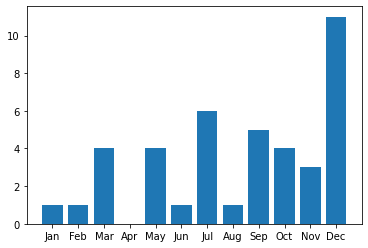

In [41]:
plt.bar(months,number_of_days)
# plt.yticks([len(months),number_of_days])